# Machine Learning with Python 

## Digit recognition with Scikit-learn and MNIST 

##### Course: 'Skills: Programming - Introduction Level' 

    Ana Carolina Dias (AnaCarolinaDias)
    Alexandre Guye-Bergeret (AlexG)
    Armin Handanagic (scriptxbaby)
    Janek Mattheus (Muggy)
    Michael Sigg (Michi98) 

### Setup 

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Used for Confusion matrix
from sklearn import metrics

#Used for importing the data
import mnist

%matplotlib inline

#### Loading the data 

In [42]:
# downloading the data via the mnist package 

train_img = mnist.train_images()
train_lbl = mnist.train_labels()

test_img = mnist.test_images()
test_lbl = mnist.test_labels()

# reshape the data: so that we have two dimensional data
train_img = train_img.reshape((train_img.shape[0], train_img.shape[1] * train_img.shape[2]))
test_img =  test_img.reshape((test_img.shape[0], test_img.shape[1] * test_img.shape[2]))

In [43]:
print(train_img.shape)
    # in the training set, we have 60'000 digits, 
    # and each digit is represented by 784 pixels (which are our features to predict the label (digit))
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Data Analysis

#### Showing the first 5 Training Digits and Labels

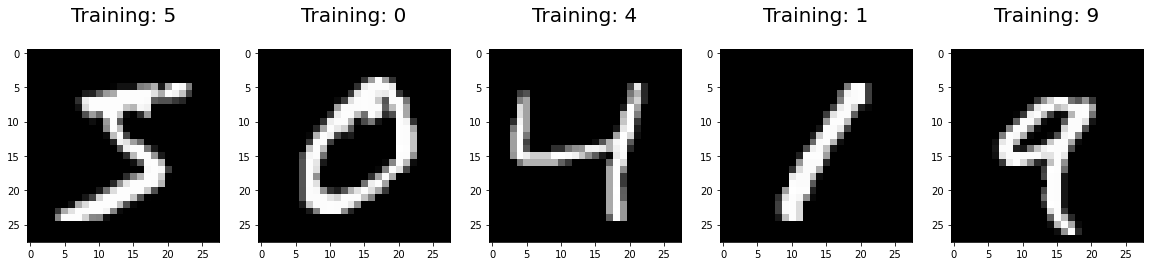

In [44]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [45]:
#This is how the number 5 is represented in the data
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [143]:
# count of each digit in training set 
unique, counts = np.unique(train_lbl, return_counts=True)
dict(zip(unique, counts))

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

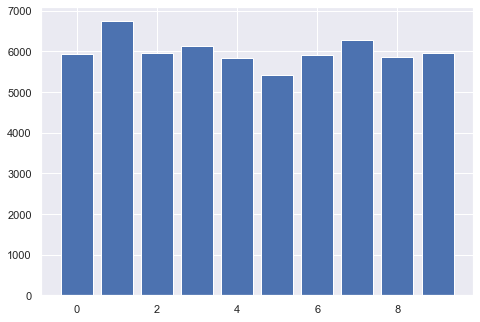

In [142]:
# illustrated as a figure 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
digits = [0,1,2,3,4,5,6,7,8,9]
count = counts
ax.bar(digits, counts)
plt.show()

### Logistic Regression

In [81]:
# Importing the model we want to use
from sklearn.linear_model import LogisticRegression

In [82]:
# Make an instance of the Model 
# we need to change the solver (default is very slow)
logisticRegr = LogisticRegression(C=50.0, penalty="l1", solver="saga", tol=0.1)

In [83]:
# Training the model on our training data
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=50.0, penalty='l1', solver='saga', tol=0.1)

In [84]:
# Use the model to make predictions on testing data 
predictions_log = logisticRegr.predict(test_img)

In [85]:
predictions_log.shape

(10000,)

In [86]:
# Measuring Performance/ Accuracy
logisticRegr.score(test_img, test_lbl)

0.924

### Random Forest 

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(train_img, train_lbl)

RandomForestClassifier(n_estimators=80)

In [89]:
predictions_rf = rf.predict(test_img)

In [96]:
rf.score(test_img, test_lbl)

0.9694

### Neural Network Classifier

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(train_img, train_lbl)

MLPClassifier(random_state=42)

In [99]:
mlp_clf.score(test_img, test_lbl)

0.9593

### Evaluating Models Using K-Fold Cross Validation 

In [76]:
from sklearn.model_selection import cross_val_score

In [101]:
# Cross-Validation Score for Logistic Regression
log_score = cross_val_score(LogisticRegression(C=50.0, penalty="l1", solver="saga", tol=0.1), train_img, train_lbl)

In [102]:
# Cross-Validation Score for RandomForest 
rf_score = cross_val_score(RandomForestClassifier(n_estimators=40), train_img, train_lbl)

In [103]:
# Cross-Validation Score for Neural Network 
mlp_score = cross_val_score(MLPClassifier(random_state=42), train_img, train_lbl)

In [118]:
# Which model had the best average score? 
print('Logistic Regression Score: ', log_score.mean())
print('Random Forest Score: ', rf_score.mean())
print('Neural Network Score: ', mlp_score.mean())

Logistic Regression Score:  0.9195166666666668
Random Forest Score:  0.9622666666666667
Neural Network Score:  0.9607333333333333


#### Evaluation

As can be seen above, using a 5-Fold Cross Validation, the Random Forest Classifier achieves a sligthy higher accuracy than our neural network classifier and is significantly higher than a Logistic Regression. Therefore, the Random Forest model is best suited to predict the digits in our data and the rest of our project will focus on it.

## Measuring the Model Performance 
### Confusion Matrix

In [52]:
def plot_confusion_matrix(cm, title = 'Confusion Matrix', cmap = 'Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], rotation = 45, size = 10)
    plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center')

<Figure size 432x288 with 0 Axes>

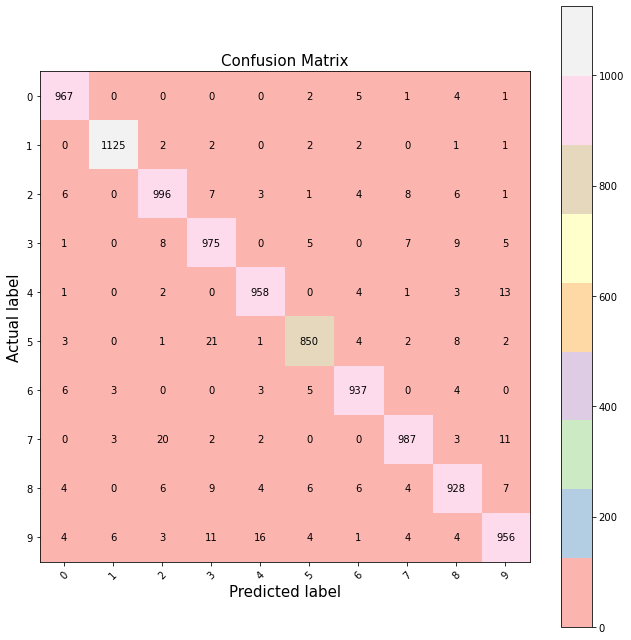

In [93]:
# confusion matrix for predictions by random forest
confusion = metrics.confusion_matrix(test_lbl, predictions_rf)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

### Display some Misclassified images with Predicted Labels

In [94]:
index = 0
misclassifiedIndex = []
for label, predict in zip(test_lbl, predictions_rf):
    if label != predict:
        misclassifiedIndex.append(index)
    index += 1

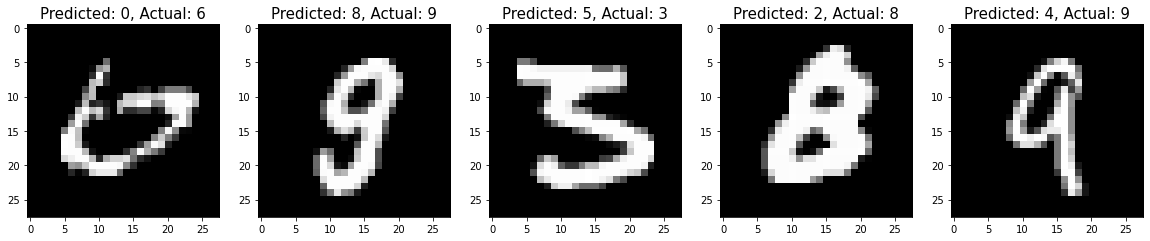

In [95]:
plt.figure(figsize = (20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1,5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'. format(predictions_rf[badIndex], test_lbl[badIndex]), fontsize = 15)